In [58]:
# Import needed modules
import numpy as np
from matplotlib import pyplot as plt
from yroots.subdivision import solve
import yroots as yr

# cb has a lot of functions that I've already been using to
# get results from the chebsuite, but we don't need the 
# whole script in one cell.
import cheb_results as cb
# Some functions that might be nice to know from cb:
# cb.residuals(func, roots)
# cb.norm_pass_or_fail(func, yroots, chebroots)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Test 1.2

In this test, we can sometimes get better residuals than Chebfun. Sometimes we don't though, so this may be an interesting example to look at through different tolerances.

Percent Finished: 100%                                                  
Total intervals checked was 988
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Macaulay', 'Too Deep']
The percent solved by each was [15.7895 80.5668  0.      3.6437  0.    ]


<Figure size 3600x2400 with 0 Axes>

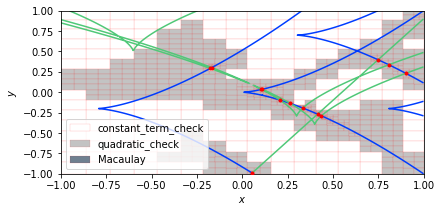

[4.18135850e-13 3.76888463e-12 2.52975949e-12 8.90926709e-14
 9.31880838e-14 2.45580704e-14 1.08711215e-13 8.96184921e-14
 6.51153126e-13 5.52226176e-14 1.88452055e-12 8.29264034e-14
 4.54464601e-14]
[6.41233155e-14 2.38796572e-12 1.43076545e-11 3.21765338e-13
 6.27174085e-13 9.39480146e-15 2.60609332e-14 1.90145008e-13
 1.73405998e-15 6.15205957e-14 1.23491374e-12 6.12942494e-14
 5.80333523e-14]


In [59]:
# Test 1.2
f = lambda x,y: (y**2-x**3)*((y-0.7)**2-(x-0.3)**3)*((y+0.2)**2-(x+0.8)**3)*((y+0.2)**2-(x-0.8)**3)
g = lambda x,y: ((y+.4)**3-(x-.4)**2)*((y+.3)**3-(x-.3)**2)*((y-.5)**3-(x+.6)**2)*((y+0.3)**3-(2*x-0.8)**3)
yroots = solve([f,g],[-1,-1],[1,1], plot=True, plot_intervals=True)
chebfun_roots = np.loadtxt('tests/chebfun_test_output/cftest1_2.csv',delimiter=',')


print(cb.residuals(f, yroots))
print(cb.residuals(g, yroots))

# Test 2.2

This test is just interesting because there are just two roots, and it seems like it'd be easy fro them to get swallowed up into one, especially since they're near the origin. We can also usually get pretty decent residuals from this one.

Percent Finished: 100%                                                  
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Macaulay', 'Too Deep']
The percent solved by each was [  0.   0.   0. 100.   0.]


<Figure size 3600x2400 with 0 Axes>

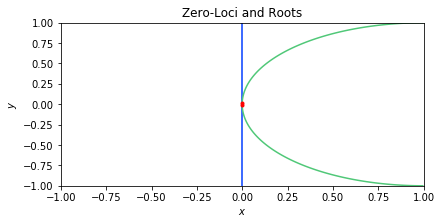

[6.94700273e-17 6.96534772e-17]
[4.4408921e-16 4.4408921e-16]


In [72]:
# Test 2.2
f = lambda x,y: x
g = lambda x,y: (x-.9999)**2 + y**2-1
yroots = solve([f,g],[-1,-1],[1,1], plot=True)
m_sq_roots = np.loadtxt('tests/chebfun_test_output/cftest2_2ms.csv', delimiter=',')
chebfun_roots = np.loadtxt('tests/chebfun_test_output/cftest2_2.csv', delimiter=',')

print(cb.residuals(f, yroots))
print(cb.residuals(g, yroots))

# Test 2.3

This test was exhibiting some weird behavior when I was last playing with the tolerances. It seemed like it was easy to drop roots by setting too tight of a tolerance, so this is one to keep an eye on.

Percent Finished: 100%                                                  
Total intervals checked was 223
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Macaulay', 'Too Deep']
The percent solved by each was [34.5291 62.3318  0.      3.139   0.    ]


<Figure size 3600x2400 with 0 Axes>

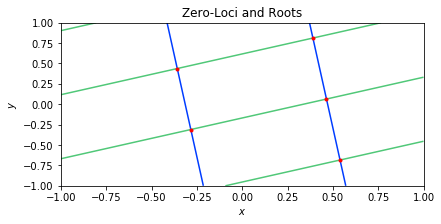

[5.76662085e-12 1.45984370e-12 8.07973833e-09 1.65050196e-11
 1.01613178e-08]
[3.56597512e-12 2.01844669e-12 2.63923273e-08 2.98604972e-11
 1.43536792e-08]


In [61]:
# Test 2.3
f = lambda x,y: np.sin(4*(x + y/10 + np.pi/10))
g = lambda x,y: np.cos(2*(x-2*y+ np.pi/7))
yroots = solve([f,g],[-1,-1],[1,1], plot=True)
m_sq_roots = np.loadtxt('tests/chebfun_test_output/cftest2_3ms.csv', delimiter=',')
chebfun_roots = np.loadtxt('tests/chebfun_test_output/cftest2_3.csv', delimiter=',')

print(cb.residuals(f, yroots))
print(cb.residuals(g, yroots))

# Test 4.2

Of course we have to include this classic headache! We don't generally get good residuals (1e-7), but niether does Chebfun, and it would be interseting to see if we can speed this up.

Percent Finished: 100%                                                  
Total intervals checked was 397
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Macaulay', 'Too Deep']
The percent solved by each was [76.3224 22.67    0.      1.0076  0.    ]


<Figure size 3600x2400 with 0 Axes>

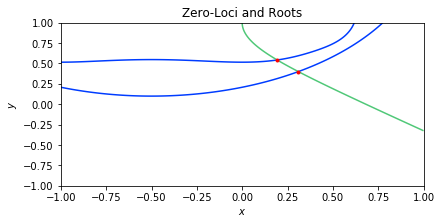

In [62]:
# Test 4.2
# TODO Expect this one to freeze.
# TODO It keeps going too deep. Why?
f = lambda x,y: ((90000*y**10 + (-1440000)*y**9 + (360000*x**4 + 720000*x**3 + 504400*x**2 + 144400*x + 9971200)*(y**8) + 
            ((-4680000)*x**4 + (-9360000)*x**3 + (-6412800)*x**2 + (-1732800)*x + (-39554400))*(y**7) + (540000*x**8 + 
            2160000*x**7 + 3817600*x**6 + 3892800*x**5 + 27577600*x**4 + 51187200*x**3 + 34257600*x**2 + 8952800*x + 100084400)*(y**6) + 
            ((-5400000)*x**8 + (-21600000)*x**7 + (-37598400)*x**6 + (-37195200)*x**5 + (-95198400)*x**4 + 
            (-153604800)*x**3 + (-100484000)*x**2 + (-26280800)*x + (-169378400))*(y**5) + (360000*x**12 + 2160000*x**11 + 
            6266400*x**10 + 11532000*x**9 + 34831200*x**8 + 93892800*x**7 + 148644800*x**6 + 141984000*x**5 + 206976800*x**4 + 
            275671200*x**3 + 176534800*x**2 + 48374000*x + 194042000)*(y**4) + ((-2520000)*x**12 + (-15120000)*x**11 + (-42998400)*x**10 + 
            (-76392000)*x**9 + (-128887200)*x**8 + (-223516800)*x**7 + (-300675200)*x**6 + (-274243200)*x**5 + (-284547200)*x**4 + 
            (-303168000)*x**3 + (-190283200)*x**2 + (-57471200)*x + (-147677600))*(y**3) + (90000*x**16 + 720000*x**15 + 3097600*x**14 + 
            9083200*x**13 + 23934400*x**12 + 58284800*x**11 + 117148800*x**10 + 182149600*x**9 + 241101600*x**8 + 295968000*x**7 + 
            320782400*x**6 + 276224000*x**5 + 236601600*x**4 + 200510400*x**3 + 123359200*x**2 + 43175600*x + 70248800)*(y**2) + 
            ((-360000)*x**16 + (-2880000)*x**15 + (-11812800)*x**14 + (-32289600)*x**13 + (-66043200)*x**12 + (-107534400)*x**11 + 
            (-148807200)*x**10 + (-184672800)*x**9 + (-205771200)*x**8 + (-196425600)*x**7 + (-166587200)*x**6 + (-135043200)*x**5 + 
            (-107568800)*x**4 + (-73394400)*x**3 + (-44061600)*x**2 + (-18772000)*x + (-17896000))*y + (144400*x**18 + 1299600*x**17 + 
            5269600*x**16 + 12699200*x**15 + 21632000*x**14 + 32289600*x**13 + 48149600*x**12 + 63997600*x**11 + 67834400*x**10 + 
            61884000*x**9 + 55708800*x**8 + 45478400*x**7 + 32775200*x**6 + 26766400*x**5 + 21309200*x**4 + 11185200*x**3 + 6242400*x**2 + 
            3465600*x + 1708800)))
g = lambda x,y: 1e-4*(y**7 + (-3)*y**6 + (2*x**2 + (-1)*x + 2)*y**5 + (x**3 + (-6)*x**2 + x + 2)*y**4 + (x**4 + (-2)*x**3 + 2*x**2 + 
            x + (-3))*y**3 + (2*x**5 + (-3)*x**4 + x**3 + 10*x**2 + (-1)*x + 1)*y**2 + ((-1)*x**5 + 3*x**4 + 4*x**3 + (-12)*x**2)*y + 
            (x**7 + (-3)*x**5 + (-1)*x**4 + (-4)*x**3 + 4*x**2))
yroots = solve([f,g],[-1,-1],[1,1], plot=True)
m_sq_roots = np.loadtxt('tests/chebfun_test_output/cftest4_2ms.csv',delimiter=',')
chebfun_roots = None


# Test 6.2

Our pride and joy! Here's the test where we find 2 roots near the origin where there should be 2! If this breaks, we have a problem... However, we also don't generally subdivide here, so this may be less interesting.

Percent Finished: 100%                                                  
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Macaulay', 'Too Deep']
The percent solved by each was [  0.   0.   0. 100.   0.]


<Figure size 3600x2400 with 0 Axes>

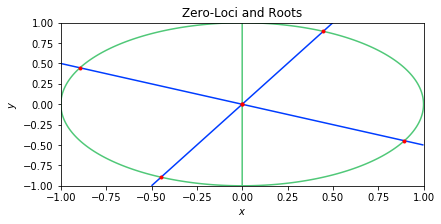

[1.48952049e-15 1.24126708e-16 1.08443012e-16 3.65511582e-16
 7.44760246e-16 2.48253415e-16]
[1.48985356e-15 1.19148317e-15 7.57940779e-13 7.58227387e-13
 3.47477066e-16 7.94499747e-16]


In [63]:
# Test 6.2
f = lambda x,y: (y - 2*x)*(y+.5*x)
g = lambda x,y: (x-.0001)*(x**2+y**2-1)
yroots = solve([f,g],[-1,-1],[1,1], plot=True)
chebfun_roots = np.loadtxt('tests/chebfun_test_output/cftest6_2.csv', delimiter=',')
actual_roots = np.array([[1/10000,-1/20000],[1/10000, 1/5000],[-2/np.sqrt(5),1/np.sqrt(5)],[-1/np.sqrt(5),-2/np.sqrt(5)],[1/np.sqrt(5),2/np.sqrt(5)],[2/np.sqrt(5),-1/np.sqrt(5)]])


print(cb.residuals(f, yroots))
print(cb.residuals(g, yroots))

# Test 10.1

This is the one where we may see boundary problems (the roots are all right on the boundary that we give), so it's possible that different tolerances will drop roots.

Percent Finished: 100%                                                  
Total intervals checked was 502
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Macaulay', 'Too Deep']
The percent solved by each was [38.0478 58.5657  0.1992  3.1873  0.    ]


/home/lukas/Research/RootFinding/yroots/IntervalChecks.py:266: UserWarning: No contour levels were found within the data range.
  plt.contour(X,Y,funcs[i](X,Y),levels=[0],colors=contour_colors[i])


<Figure size 3600x2400 with 0 Axes>

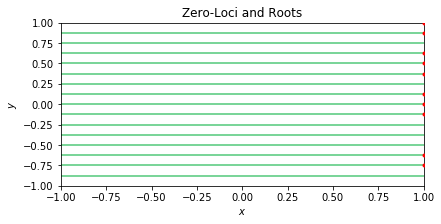

Test 10.1
	 Residual test: fail
	 Chebfun passes residual test
A different number of roots were found.
Yroots: 10
Chebfun Roots: 17
A different number of roots were found.
Yroots: 10
MS/Actual: 17
YRoots max residuals:
	f0: 2.1164914455540668e-05
	f1: 0.00013033425521324037
Chebfun max residuals:
	f0: 0.0
	f1: 2.4887784701984463e-15
MS/Actual max residuals:
	f0: 0.0
	f1: 2.4887784701984463e-15


ValueError: operands could not be broadcast together with shapes (10,) (17,) 

In [64]:
# Test 10.1
f = lambda x,y: (x-1)*(np.cos(x*y**2)+2)
g = lambda x,y: np.sin(8*np.pi*y)*(np.cos(x*y)+2)
yroots = solve([f,g],[-1,-1],[1,1], plot=True)
chebfun_roots = np.loadtxt('tests/chebfun_test_output/cftest10_1.csv',delimiter=',')
actual_roots = np.array([[1, -1.0], [1, -0.875], [1, -0.75], [1, -0.625], [1, -0.5], [1, -0.375],
                         [1, -0.25], [1, -0.125], [1, 0.0], [1, 0.125], [1, 0.25], [1, 0.375],
                         [1, 0.5], [1, 0.625], [1, 0.75], [1, 0.875], [1, 1.0]])

cb.verbose_pass_or_fail([f,g], yroots, actual_roots, 10.1, cheb_roots=chebfun_roots)

# 3D Example

Here's the 3D example from our demo notebook that may be interesting to look at.

In [65]:
#define the functions and the search domain
f = lambda x,y,z : np.sin(5*x+y+z)
g = lambda x,y,z : np.sin(x*y*z)
h = lambda x,y,z : x**2+y**2-z**2-1
a = -np.ones(3)
b = np.ones(3)

#solve and time
roots = yr.solve([f,g,h], a, b, check_eval_error=False)
#show the number of roots and maximal residuals
roots.shape[0],np.max(np.abs(f(*[roots[:,i] for i in range(3)]))),np.max(np.abs(g(*[roots[:,i] for i in range(3)]))),np.max(np.abs(h(*[roots[:,i] for i in range(3)])))

Percent Finished: 100%                                                  
Total intervals checked was 5258
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Macaulay', 'Too Deep']
The percent solved by each was [7.68353e+01 2.28794e+01 3.80000e-02 2.47200e-01 0.00000e+00]


(6, 2.698852592938745e-12, 1.9588155633904654e-12, 7.771561172376096e-13)

# Rosenbrock

Of course, who could forget the Rosenbrock function? We've been SUPER SLOW on this one for a while. It'd be nice if we could change that.

In [ ]:
#define function
f = lambda x,y: (1-x)**2 + 100*(y-x**2)**2

#partial derivatives
fx = lambda x,y: 2*(x-1) + 200*(y-x**2)*(-2*x)
fy = lambda x,y: 200*(y-x**2)
#find common roots
low = [-2,-1]
upp = [2,3]
%time zeros = yr.solve([fx,fy],low,upp,plot=True)

Percent Finished: 37.82%       

In [67]:
f(*zeros[0])

1.232595164407831e-30

# Another 3D Example

This is one I just kind of threw together. There are two roots, one of which is (3, 1, 4).

In [73]:
f = lambda x,y,z: np.cos(x*np.pi) + 5*y - z
g = lambda x,y,z: np.exp(x*y) - np.exp(z - 1)
h = lambda x,y,z: x + y + z - 8

a_roots = np.array([[3., 1., 4.]])

yroots = solve([f,g,h], [2, .5, 3.], [4, 1.5, 5])

Percent Finished: 100%                                                  
Total intervals checked was 4033
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Macaulay', 'Too Deep']
The percent solved by each was [10.1413 89.1892  0.6695  0.      0.    ]


In [76]:
print(f(yroots[:,0], yroots[:,1], yroots[:, 2]))
print(g(yroots[:,0], yroots[:,1], yroots[:, 2]))

[-7.99360578e-15  3.55271368e-15]
[3.30402372e-13 1.59872116e-13]
